# Analysis and visualization of hit-graph datasets

The purpose of this notebook is to analyze the preprocessed hit-graph datasets.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In /home/benjamin/b2/externals/v01-10-00/Linux_x86_64/common/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/belle2.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/benjamin/b2/externals/v01-10-00/Linux_x86_64/common/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/belle2.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/benjamin/b2/externals/v01-10-00/Linux_x86_64/common/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/belle2.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/benjamin/b2/externals/v01-10-00/Linux_x86_64/common/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/belle2_serif.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated i

In [2]:
%matplotlib inline

In [3]:
def get_sample_size(filename):
    with np.load(filename) as f:
        n_nodes = f['X'].shape[0]
        n_edges = f['y'].shape[0]
    return n_nodes, n_edges

def process_dataset(dir, n_files=None):
    files = [os.path.join(data_dir, f) for f in os.listdir(data_dir)]
    print('%i total files' % len(files))
    if n_files is not None:
        files = files[:n_files]
    shapes = np.array([get_sample_size(f) for f in files if not 'ID' in f])
    n_nodes, n_edges = shapes[:,0], shapes[:,1]
    return n_nodes, n_edges

## Small dataset

In [4]:
data_dir = "/home/benjamin/xtracker/examples/data/hitgraphs_belle2_vtxonly"
n_files = 1000

In [5]:
n_nodes, n_edges = process_dataset(data_dir, n_files)

34400 total files


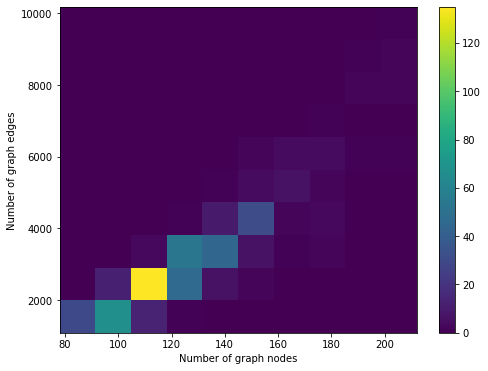

In [6]:
plt.figure(figsize=(8,6))

plt.hist2d(n_nodes, n_edges)
plt.xlabel('Number of graph nodes')
plt.ylabel('Number of graph edges')
plt.colorbar();

## Test

In [7]:
def get_sample_results(filename):
    with np.load(filename) as f:
        n_nodes = f['X'].shape[0]
        n_edges = f['y'].shape[0]
        purity = f['y'].mean()
    return n_nodes, n_edges, purity

In [8]:
n_files = 100

In [9]:
files = [os.path.join(data_dir, f) for f in os.listdir(data_dir)]
print('%i total files' % len(files))
if n_files is not None:
    files = files[:n_files]
sample_results = [get_sample_results(f) for f in files if not 'ID' in f]
n_nodes, n_edges, purity = zip(*sample_results)

34400 total files


Text(0, 0.5, 'Number of events')

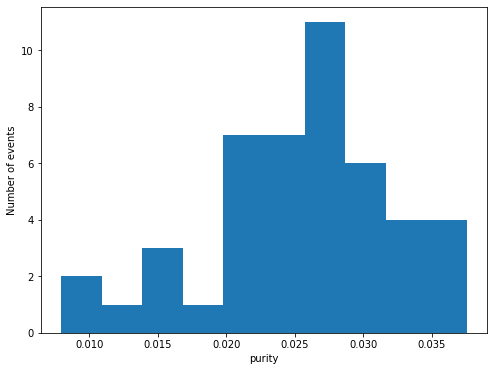

In [10]:
plt.figure(figsize=(8,6))

plt.hist(purity)
plt.xlabel('purity')
plt.ylabel('Number of events')
